In [3]:
# Hello, welcome to my analysis on India E-Commerce Dataset
# Link to the Dataset: https://www.kaggle.com/datasets/benroshan/ecommerce-data
# I personally researched a lot of author's notebooks so several codes here are very similar to them
# I have only just begun, if you spot any mistake, unprofessional codes, please let me know. Thank you

In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import calendar as cld
# import necessary packages for analysis

In [5]:
cd "D:/Hung's Project/Datasets/E-Commerce Data"

D:\Hung's Project\Datasets\E-Commerce Data


In [6]:
list_of_orders = pd.read_csv('./List of Orders.csv', encoding = 'UTF8')
order_details = pd.read_csv('./Order Details.csv', encoding = 'UTF8')
sales_target = pd.read_csv('./Sales target.csv', encoding = 'UTF8')
# import data into 3 seperates table, we can merge them when needed

In [7]:
list_of_orders.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


In [8]:
list_of_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 22.0+ KB


In [9]:
list_of_orders.describe()

,Order ID,Order Date,CustomerName,State,City
count,500,500,500,500,500
unique,500,307,332,19,24
top,B-25601,24-11-2018,Shreya,Madhya Pradesh,Indore
freq,1,7,6,101,76


In [10]:
# Change Order Data datatype into datetime datatype
list_of_orders['Order Date'] = list_of_orders['Order Date'].astype('datetime64[ns]')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '13-04-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '15-04-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '17-04-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '18-04-2018' in DD/MM/YYYY format. Provide format or specif

In [11]:
list_of_orders.dtypes

Order ID                object
Order Date      datetime64[ns]
CustomerName            object
State                   object
City                    object
dtype: object

In [12]:
list_of_orders.isnull().sum()
# Null count

Order ID        60
Order Date      60
CustomerName    60
State           60
City            60
dtype: int64

In [13]:
list_of_orders = list_of_orders.dropna()
list_of_orders.info()
# remove null 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      500 non-null    object        
 1   Order Date    500 non-null    datetime64[ns]
 2   CustomerName  500 non-null    object        
 3   State         500 non-null    object        
 4   City          500 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 23.4+ KB


In [14]:
order_details.info()
order_details.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Amount        1500 non-null   float64
 2   Profit        1500 non-null   float64
 3   Quantity      1500 non-null   int64  
 4   Category      1500 non-null   object 
 5   Sub-Category  1500 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 70.4+ KB


Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
dtype: int64

In [15]:
order_details.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [16]:
order_details = order_details.astype({'Category':'category','Sub-Category':'category'})
# changing these two into category datatype

In [17]:
order_details.dtypes

Order ID          object
Amount           float64
Profit           float64
Quantity           int64
Category        category
Sub-Category    category
dtype: object

In [18]:
order_details.describe()

,Amount,Profit,Quantity
count,1500.000000,1500.000000,1500.000000
mean,287.668000,15.970000,3.743333
std,461.050488,169.140565,2.184942
min,4.000000,-1981.000000,1.000000
25%,45.000000,-9.250000,2.000000
50%,118.000000,9.000000,3.000000
75%,322.000000,38.000000,5.000000
max,5729.000000,1698.000000,14.000000


In [19]:
sales_target.info()
sales_target.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month of Order Date  36 non-null     object 
 1   Category             36 non-null     object 
 2   Target               36 non-null     float64
dtypes: float64(1), object(2)
memory usage: 992.0+ bytes


Month of Order Date    0
Category               0
Target                 0
dtype: int64

In [20]:
sales_target.head()

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0


In [21]:
sales_target = sales_target.astype({'Category':'category'})

In [22]:
sales_target.dtypes

Month of Order Date      object
Category               category
Target                  float64
dtype: object

In [23]:
sales_target.describe()

,Target
count,36.000000
mean,12108.333333
std,2667.837541
min,9000.000000
25%,10050.000000
50%,11450.000000
75%,14500.000000
max,16000.000000


In [24]:
# Now let us begin with the Order Details table, we can group the Order Id and calculate total amount, profit and quantity
details_summarise = order_details.groupby('Order ID').sum()
details_summarise.head()

,Amount,Profit,Quantity
Order ID,,,
B-25601,1429.0,-1218.0,19
B-25602,3889.0,975.0,22
B-25603,2025.0,-180.0,25
B-25604,222.0,22.0,11
B-25605,75.0,0.0,7


In [25]:
# Merge these two tables for state, city,... total profit, quantity,...
full_df = pd.merge(details_summarise,list_of_orders, on = 'Order ID')

In [26]:
full_df

,Order ID,Amount,Profit,Quantity,Order Date,CustomerName,State,City
0,B-25601,1429.0,-1218.0,19,2018-01-04,Bharat,Gujarat,Ahmedabad
1,B-25602,3889.0,975.0,22,2018-01-04,Pearl,Maharashtra,Pune
2,B-25603,2025.0,-180.0,25,2018-03-04,Jahan,Madhya Pradesh,Bhopal
3,B-25604,222.0,22.0,11,2018-03-04,Divsha,Rajasthan,Jaipur
4,B-25605,75.0,0.0,7,2018-05-04,Kasheen,West Bengal,Kolkata
...,...,...,...,...,...,...,...,...
495,B-26096,1091.0,121.0,18,2019-03-28,Atharv,West Bengal,Kolkata
496,B-26097,1688.0,-504.0,23,2019-03-28,Vini,Karnataka,Bangalore
497,B-26098,1189.0,350.0,21,2019-03-29,Pinky,Jammu and Kashmir,Kashmir
498,B-26099,3417.0,859.0,15,2019-03-30,Bhishm,Maharashtra,Mumbai


In [27]:
# Extract year, month from Order Date columns
full_df['Year'] = pd.DatetimeIndex(full_df['Order Date']).year
full_df['Month_Number'] = pd.DatetimeIndex(full_df['Order Date']).month
full_df['Month'] = full_df['Month_Number'].apply(lambda x: cld.month_abbr[x])

In [28]:
year_month_summarise = full_df.groupby(['Year','Month','Month_Number']).sum().sort_values(['Year','Month_Number'])

In [29]:
year_month_summarise.columns

Index(['Amount', 'Profit', 'Quantity'], dtype='object')

In [30]:
year_month_summarise.reset_index(drop = False, inplace = True)

In [31]:
year_month_summarise = year_month_summarise.set_index(['Year','Month'])

In [32]:
year_month_summarise = year_month_summarise.drop('Month_Number', axis = 1)

In [33]:
year_month_summarise = year_month_summarise.reset_index()

In [34]:
year_month_summarise.head()

,Year,Month,Amount,Profit,Quantity
0,2018,Jan,18035.0,-3296.0,203
1,2018,Feb,6566.0,685.0,58
2,2018,Mar,7434.0,669.0,144
3,2018,Apr,26170.0,-1043.0,337
4,2018,May,20422.0,-891.0,306


In [35]:
# Create a new column, and add condition when profit > 0 or profit < 0 so we can mark color on them later
year_month_summarise['Color'] = np.where(year_month_summarise['Profit']<0, 'Loss','Gain')

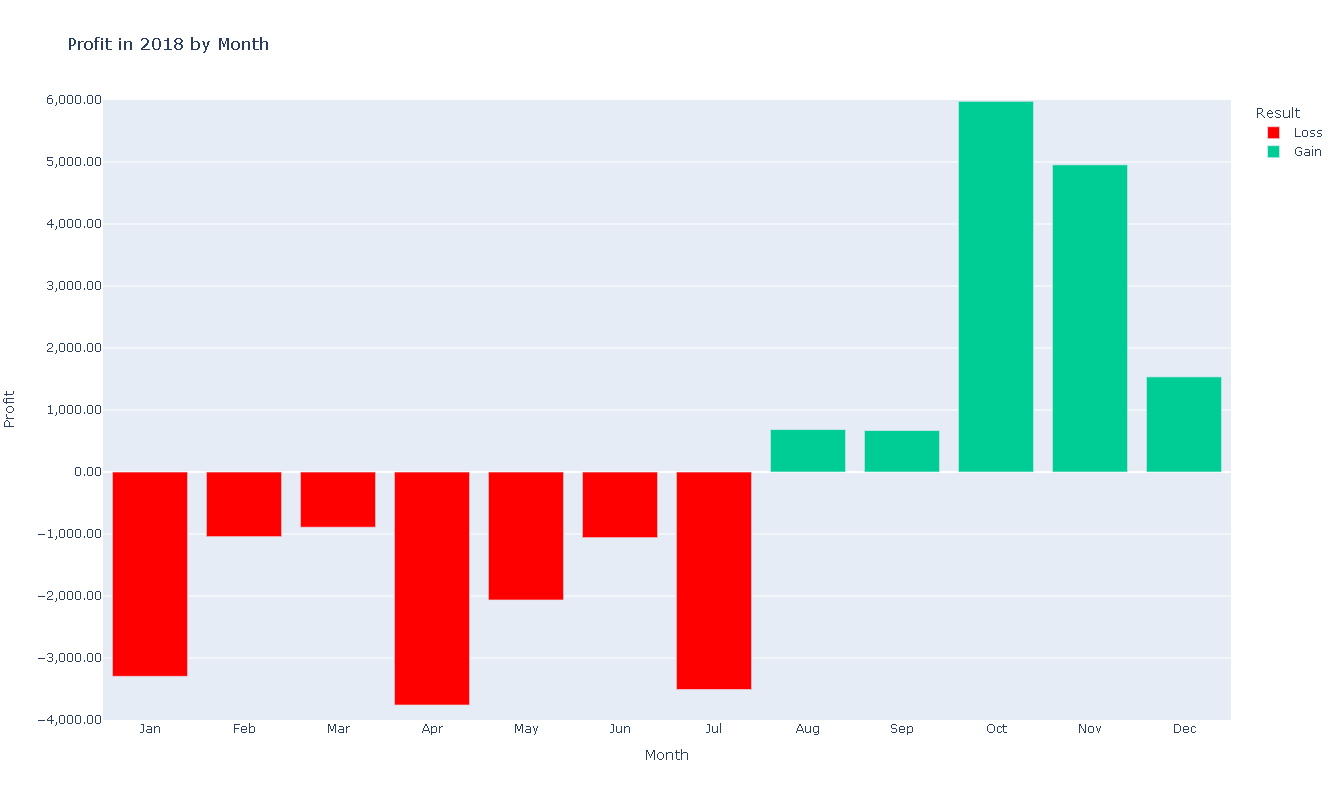

In [86]:
# Because I dropped the month number ealier so now I have to manually arange the x label, but overall the chart is good enough, this is for the year 2018
fig_2018 = px.bar(year_month_summarise[year_month_summarise['Year'] == 2018], x = 'Month', y = 'Profit', color = 'Color',
                  title = 'Profit in 2018 by Month',
                  labels = dict( Month = 'Month', Profit = 'Profit', Color = 'Result'),
                  color_discrete_map = {
                      'Loss':'red',
                      'Profit':'green'},
                 width = 1000, height = 800)
fig_2018.update_layout(yaxis_tickformat = ',.2f', yaxis = dict(range = [-4000,6000]))
fig_2018.update_layout(xaxis = dict(tickvals = [0,1,2,3,4,5,6,7,8,9,10,11],
                                     ticktext = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']))
fig_2018.show()

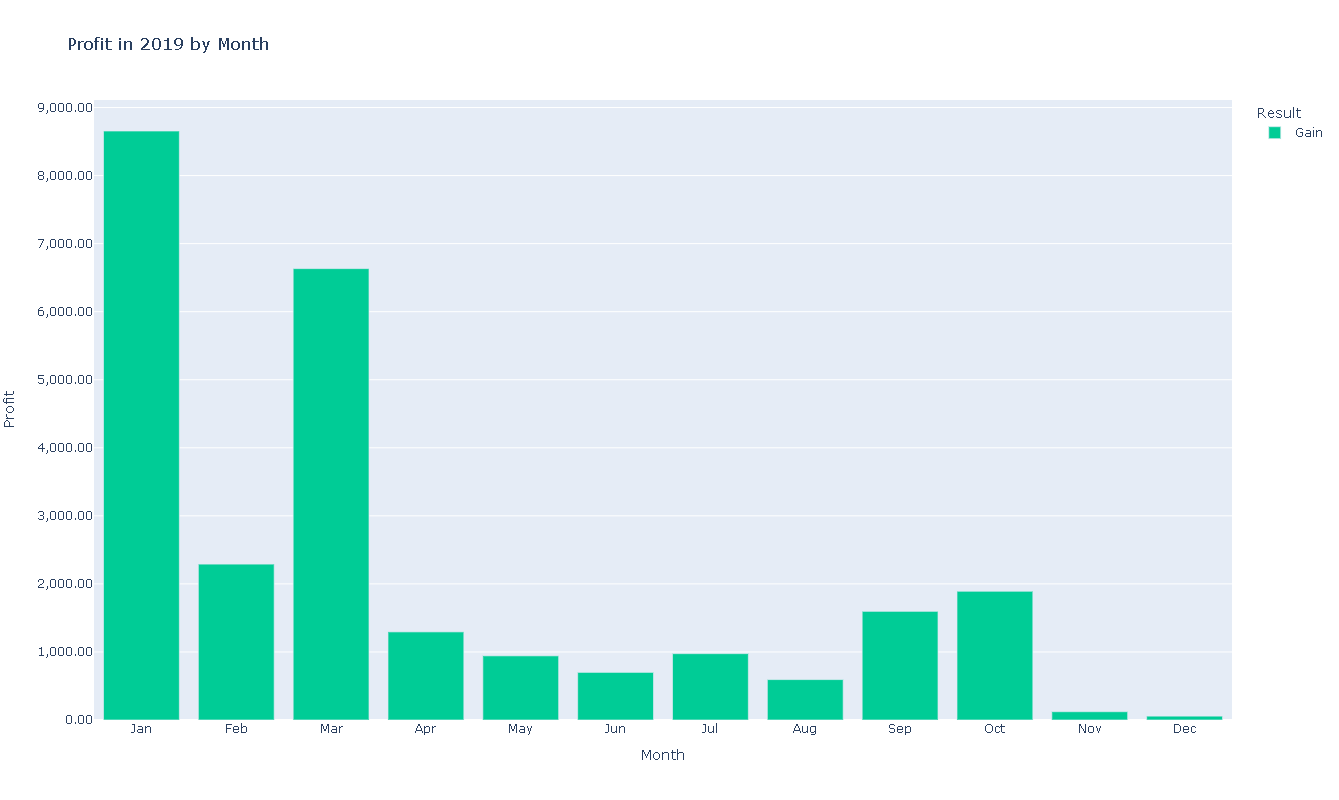

In [87]:
# Same with previous, for year 2019
fig_2019 = px.bar(year_month_summarise[year_month_summarise['Year'] == 2019], x = 'Month', y = 'Profit', color = 'Color',
                  title = 'Profit in 2019 by Month',
                  labels = dict( Month = 'Month', Profit = 'Profit', Color = 'Result'),
                  color_discrete_map = {
                      'Loss':'red',
                      'Profit':'green'},
                 width = 1000, height = 800)
fig_2019.update_layout(yaxis_tickformat = ',.2f')
fig_2019.update_layout(xaxis = dict(tickvals = [0,1,2,3,4,5,6,7,8,9,10,11],
                                     ticktext = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']))
fig_2019.show()

In [38]:
# After these two charts, I could safely assumy that the E-commerce market in India has been rising from time to time, and more in the future

In [39]:
# Profit by State
profit_state = full_df[['State','Profit']].groupby('State').sum().reset_index().sort_values('Profit')

In [40]:
profit_state.head()

,State,Profit
16,Tamil Nadu,-2216.0
13,Punjab,-609.0
0,Andhra Pradesh,-496.0
1,Bihar,-321.0
7,Jammu and Kashmir,8.0


In [41]:
profit_state['State'].count()

19

In [42]:
profit_state['Color'] = np.where(profit_state['Profit'] < 0,'Loss','Gain')

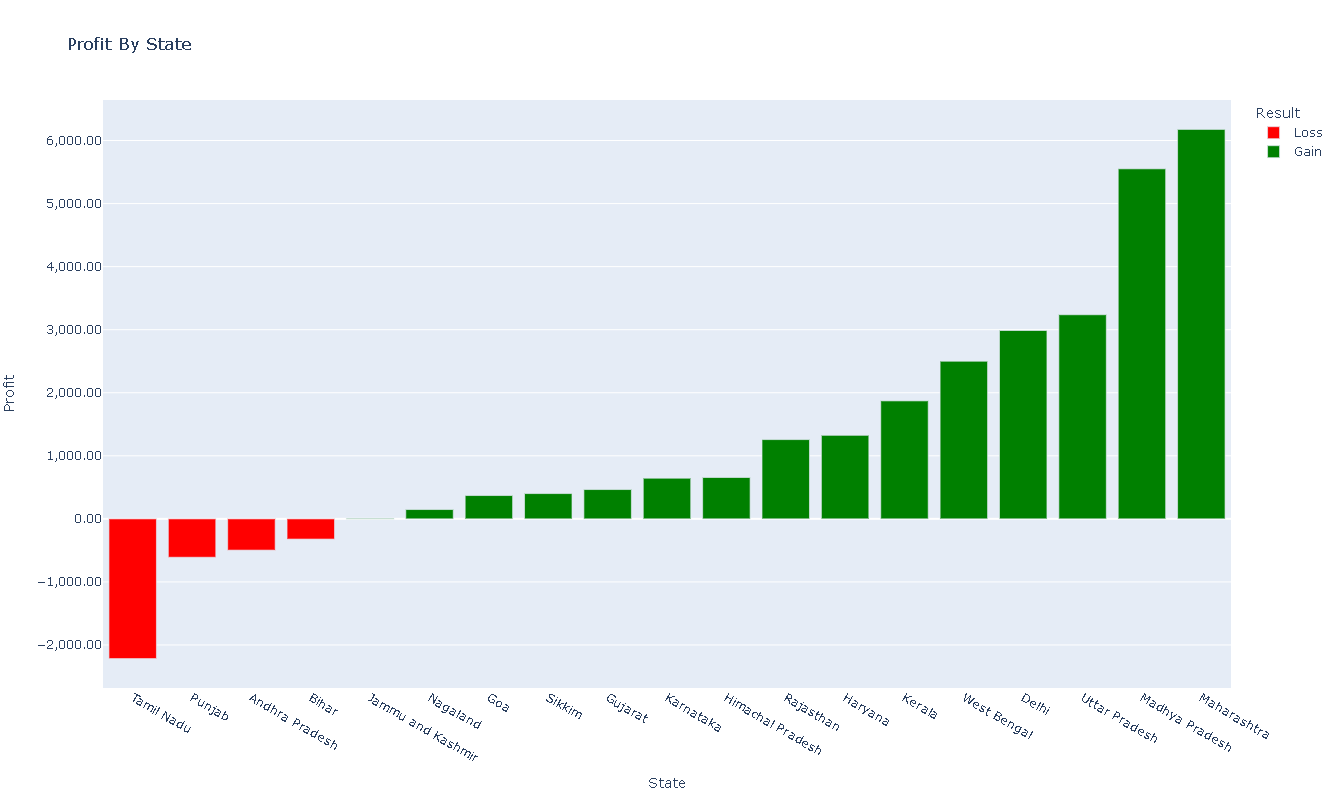

In [43]:
# Now we can continue plotting business result by State
fig_state = px.bar(profit_state, x = 'State', y = 'Profit', color = 'Color',
                   title = 'Profit By State',
                   labels = dict(State = 'State', Profit = 'Profit',  Color = 'Result'),
                   color_discrete_map={ 
                       'Loss':'red',
                       'Gain':'green'}, width = 1200, height = 800)
fig_state.update_layout(yaxis_tickformat = ',.2f')
fig_state.update_xaxes(tickangle = 30)
fig_state.show()
                   

In [44]:
# Profit by State
profit_city = full_df[['City','Profit']].groupby('City').sum().reset_index().sort_values('Profit')

In [45]:
profit_city.head()

,City,Profit
6,Chennai,-2216.0
0,Ahmedabad,-880.0
12,Jaipur,-753.0
10,Hyderabad,-496.0
18,Patna,-321.0


In [46]:
profit_city['Color'] = np.where(profit_city['Profit'] < 0,'Loss','Gain')

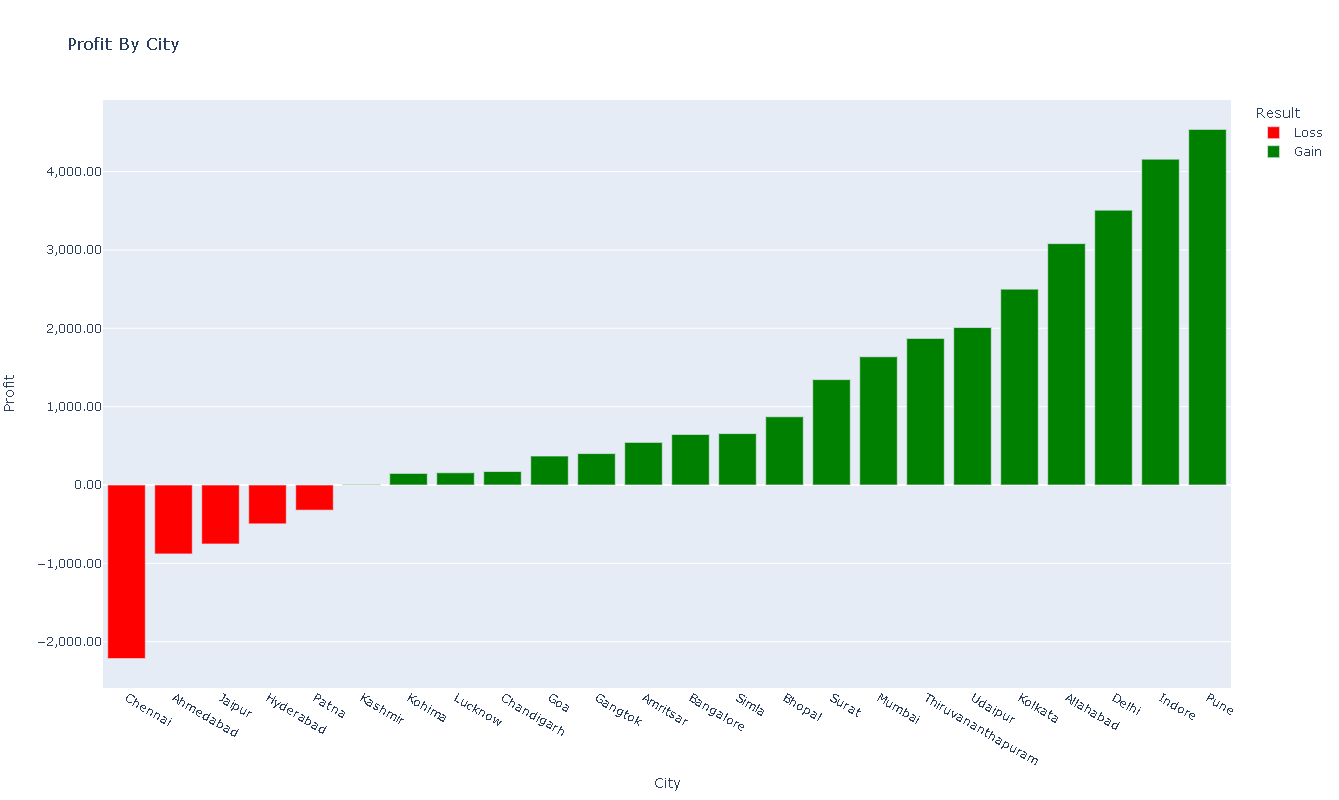

In [47]:
# Same with State, but City this time
fig_city = px.bar(profit_city, x = 'City', y = 'Profit', color = 'Color',
                   title = 'Profit By City',
                   labels = dict(City = 'City', Profit = 'Profit',  Color = 'Result'),
                   color_discrete_map={ 
                       'Loss':'red',
                       'Gain':'green'}, width = 1200, height = 800)
fig_city.update_layout(yaxis_tickformat = ',.2f')
fig_city.update_xaxes(tickangle = 30)
fig_city.show()           

In [48]:
# Next, I want to see the top 5 customer based on their Total Orders that they ordered

In [49]:
top_5_ctm = full_df[['CustomerName','Quantity']].groupby('CustomerName').sum().sort_values('Quantity', ascending = False).head(5)

In [50]:
top_5_ctm['Color'] = np.where(top_5_ctm['Quantity'] == top_5_ctm['Quantity'].max(),'red','gray')

In [51]:
top_5_ctm = top_5_ctm.reset_index()

In [52]:
top_5_ctm

,CustomerName,Quantity,Color
0,Abhishek,89,red
1,Priyanka,79,gray
2,Yaanvi,71,gray
3,Shruti,67,gray
4,Shreya,65,gray


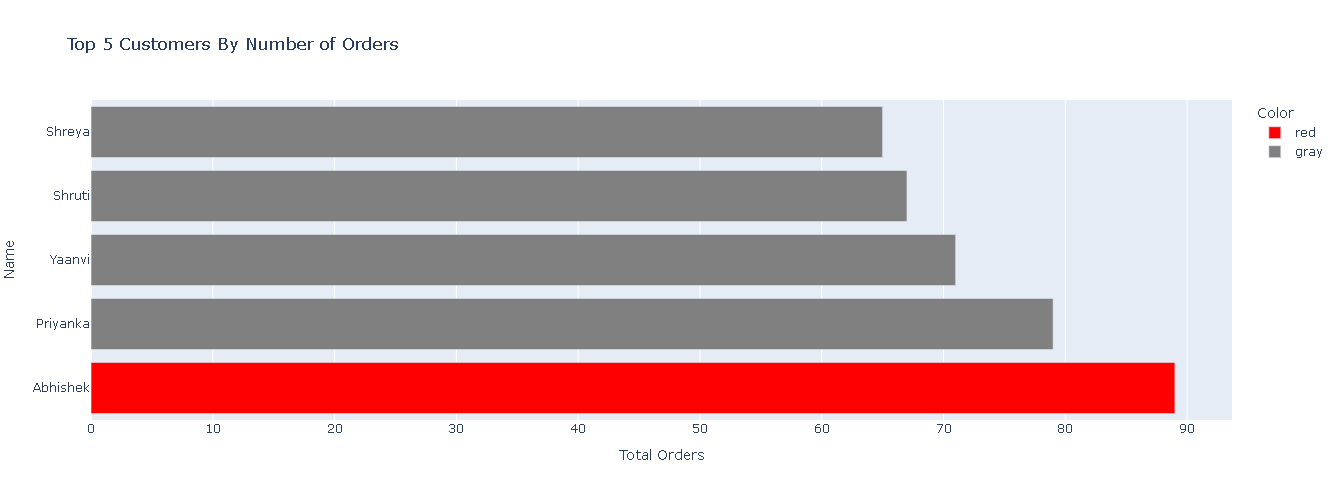

In [88]:
# Highlight the customer with the most orders
fig_customer = px.bar(top_5_ctm, x = top_5_ctm['Quantity'], y = 'CustomerName', color = 'Color',
      title = 'Top 5 Customers By Number of Orders',
       color_discrete_map = {'red':'red','gray':'gray'}, width = 1000, height = 500)
fig_customer.update_xaxes(title_text = 'Total Orders')
fig_customer.update_yaxes(title_text = 'Name')
fig_customer.show()

In [54]:
# Then, I want to create a nested pie chart on Category and Sub-Category

In [55]:
order_cat_subcat = order_details[['Category','Sub-Category','Quantity']].groupby(['Category','Sub-Category']).sum('Quantity')

In [56]:
outer = order_cat_subcat.groupby('Category').sum()

In [57]:
outer

,Quantity
Category,
Clothing,3516
Electronics,1154
Furniture,945


In [58]:
inner_labels = order_cat_subcat.index.get_level_values(1)

In [59]:
inner_labels

CategoricalIndex(['Accessories', 'Bookcases', 'Chairs', 'Electronic Games',
                  'Furnishings', 'Hankerchief', 'Kurti', 'Leggings', 'Phones',
                  'Printers', 'Saree', 'Shirt', 'Skirt', 'Stole', 'T-shirt',
                  'Tables', 'Trousers', 'Accessories', 'Bookcases', 'Chairs',
                  'Electronic Games', 'Furnishings', 'Hankerchief', 'Kurti',
                  'Leggings', 'Phones', 'Printers', 'Saree', 'Shirt', 'Skirt',
                  'Stole', 'T-shirt', 'Tables', 'Trousers', 'Accessories',
                  'Bookcases', 'Chairs', 'Electronic Games', 'Furnishings',
                  'Hankerchief', 'Kurti', 'Leggings', 'Phones', 'Printers',
                  'Saree', 'Shirt', 'Skirt', 'Stole', 'T-shirt', 'Tables',
                  'Trousers'],
                 categories=['Accessories', 'Bookcases', 'Chairs', 'Electronic Games', 'Furnishings', 'Hankerchief', 'Kurti', 'Leggings', ...], ordered=False, dtype='category', name='Sub-Category')

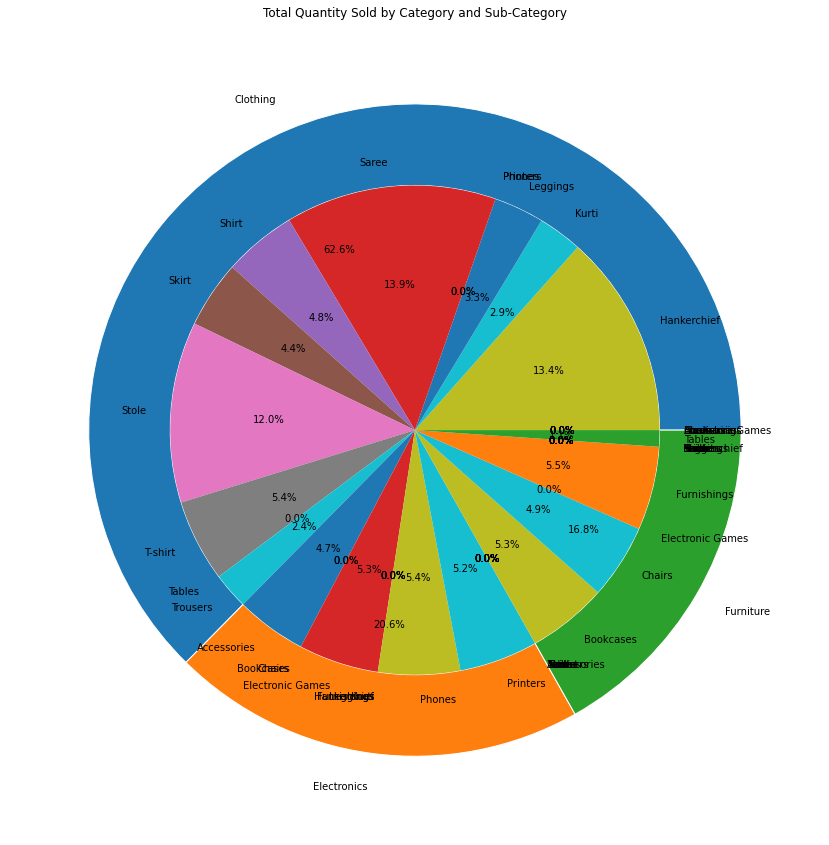

In [60]:
# The code structure I wrote here was studied by many online pages that showed me how to do the nested pie charts
fig,ax = plt.subplots(figsize = (30,15))
size = 0.25
ax.pie(outer.values.flatten(), radius = 1,
       labels = outer.index,
       autopct = '%1.1f%%',
       wedgeprops = dict(width = size, edgecolor = 'w'))
ax.pie(order_cat_subcat.values.flatten(), radius = 1 - size,
       labels = inner_labels,
       autopct = '%1.1f%%')
ax.set(aspect = 'equal', title = 'Total Quantity Sold by Category and Sub-Category')
plt.show()

In [61]:
# Now, we can plot total orders on State or City to see which State, City had the most total orders

In [62]:
state_orders  = full_df[['State']].groupby('State').value_counts().sort_values(ascending = False)

In [63]:
state_orders = state_orders.reset_index()

In [64]:
state_orders.columns = ['State','Total Orders']

In [65]:
state_orders

,State,Total Orders
0,Madhya Pradesh,101
1,Maharashtra,90
2,Rajasthan,32
3,Gujarat,27
4,Punjab,25
5,West Bengal,22
6,Delhi,22
7,Uttar Pradesh,22
8,Karnataka,21
9,Kerala,16


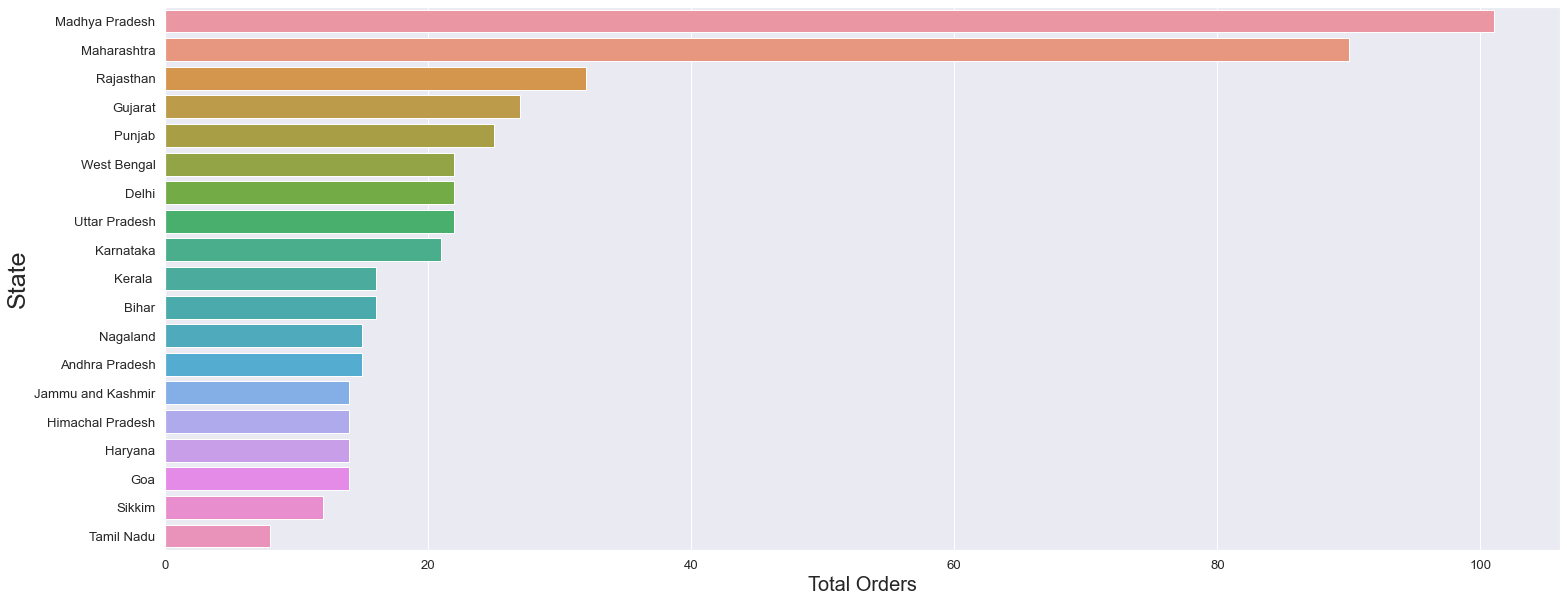

In [66]:
sns.set(rc = {'figure.figsize':(25,10)}, font_scale = 1.2)
sns.barplot(x = state_orders['Total Orders'],y = state_orders['State'])
plt.xlabel('Total Orders', fontsize = 20)
plt.ylabel('State', fontsize = 25)
plt.show()

In [67]:
city_orders = full_df[['City']].groupby('City').value_counts().sort_values(ascending = False)

In [68]:
city_orders = city_orders.reset_index()

In [69]:
city_orders.columns = ['City','Total Orders']

In [70]:
city_orders

,City,Total Orders
0,Indore,76
1,Mumbai,68
2,Chandigarh,30
3,Delhi,25
4,Pune,22
5,Bhopal,22
6,Kolkata,22
7,Bangalore,21
8,Jaipur,19
9,Ahmedabad,17


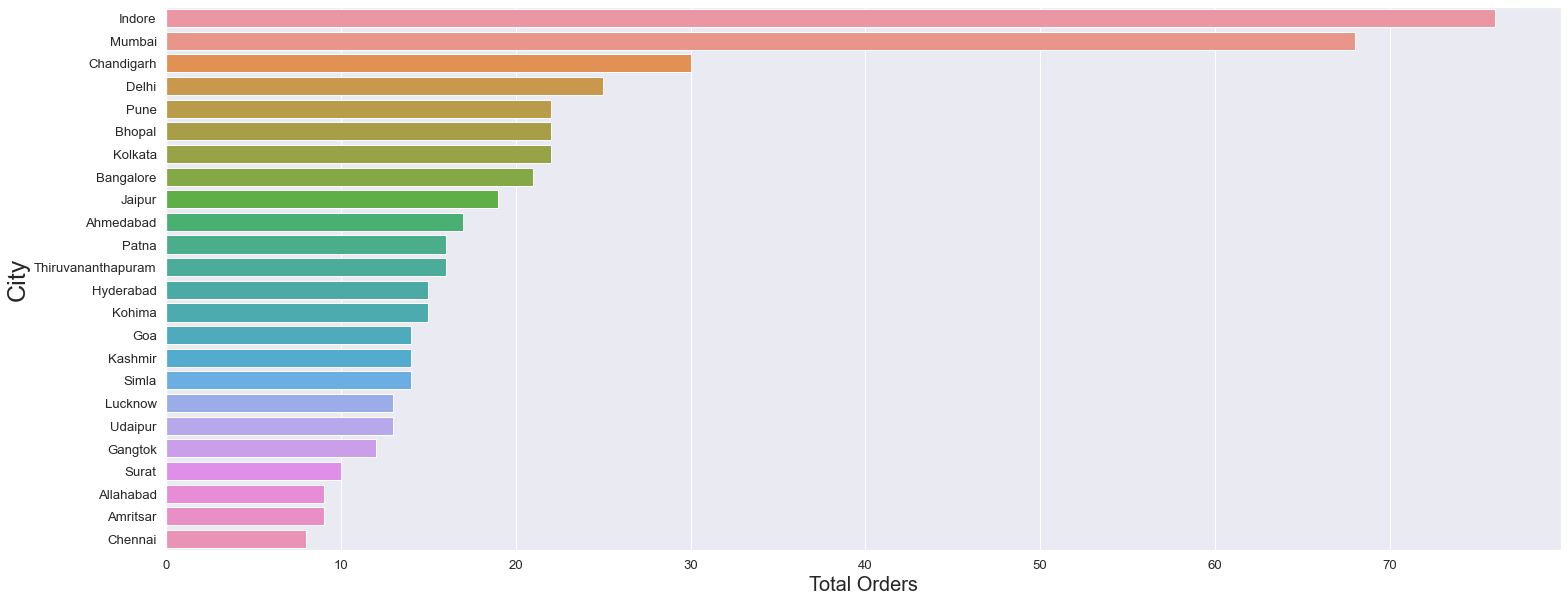

In [71]:
sns.set(rc = {'figure.figsize':(25,10)}, font_scale = 1.2)
sns.barplot(x = city_orders['Total Orders'],y = city_orders['City'])
plt.xlabel('Total Orders', fontsize = 20)
plt.ylabel('City', fontsize = 25)
plt.show()

In [72]:
# Finally, let's do the analysis on actual sales vs target sales to see whether the Actual Sales exceeded the Goal

In [73]:
# Group by Category, and the target for each category
target_sales_category = sales_target[['Category','Target']].groupby('Category').max('Target').reset_index()

In [74]:
target_sales_category

,Category,Target
0,Clothing,16000.0
1,Electronics,16000.0
2,Furniture,11800.0


In [75]:
order_details 

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones
...,...,...,...,...,...,...
1495,B-26099,835.0,267.0,5,Electronics,Phones
1496,B-26099,2366.0,552.0,5,Clothing,Trousers
1497,B-26100,828.0,230.0,2,Furniture,Chairs
1498,B-26100,34.0,10.0,2,Clothing,T-shirt


In [76]:
# Group by category and calculating the profit each category made
actual_sales_category = order_details[['Category','Profit']].groupby('Category').sum('Profit').reset_index()

In [77]:
actual_sales_category

,Category,Profit
0,Clothing,11163.0
1,Electronics,10494.0
2,Furniture,2298.0


In [78]:
# Merge two table, actual sales and target sales into 1 table
actual_vs_target = pd.merge(actual_sales_category, target_sales_category, on = 'Category')

In [79]:
actual_vs_target.columns = ('Category','Actual Sales','Target Sales')

In [80]:
actual_vs_target

,Category,Actual Sales,Target Sales
0,Clothing,11163.0,16000.0
1,Electronics,10494.0,16000.0
2,Furniture,2298.0,11800.0


In [81]:
act_vs_tar_fig = go.Figure(data = [go.Bar(name = 'Actual Sales', x = actual_vs_target['Category'], y = actual_vs_target['Actual Sales'], marker_color = 'red'),
                               go.Bar(name = 'Target Sales', x = actual_vs_target['Category'], y = actual_vs_target['Target Sales'], marker_color = 'black')])

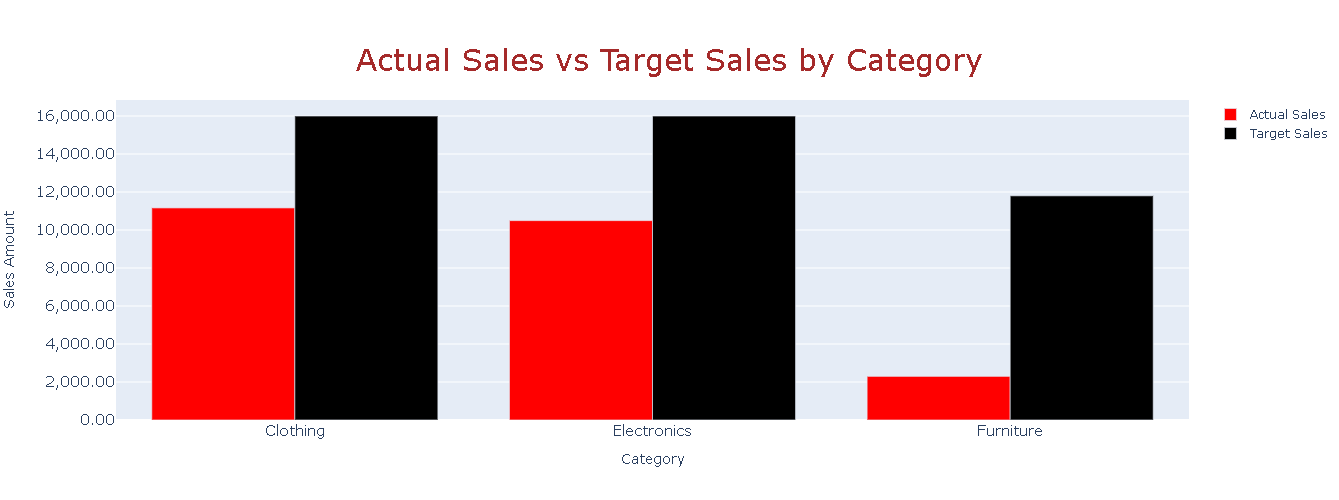

In [89]:
act_vs_tar_fig.update_layout(barmode = 'group',
                         autosize = False,
                        width = 800,
                        height = 500)
act_vs_tar_fig.update_layout(title = dict(text = 'Actual Sales vs Target Sales by Category',
                                          x = 0.5,
                                          y = 0.9,
                                          font_size = 30,
                                          font_color = 'brown'),
                             xaxis = dict(title = 'Category',
                                         titlefont_size = 21,
                                         tickfont_size = 15),
                            yaxis = dict(title = 'Sales Amount',
                                        titlefont_size = 21,
                                        tickfont_size = 15))
act_vs_tar_fig.update_layout(yaxis_tickformat = ',.2f')
act_vs_tar_fig.show()

In [83]:
# As the graph above illustrate that there was no category having the Actual Sales meet the Target Sales, and the Furniture Category is the worst.
# Total Sales on Furniture Category are only 2,298.00 Rupee but the Target they set was 11,800.00, which was embraassing

In [84]:
# Although Business Result didn't meet the expectation, the market showed the positive signs of growing overtime in the future
# E-Commerce in the future will be much more profitable once everyone changed to online shopping
# This is the end of my analysis. Thank you for reading !!! 